In [281]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [282]:
# calling dataset
cd=pd.read_csv('csse_covid_19_daily_reports_us.csv', parse_dates=['Last_Update'])
cd

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


Observation - The above data set is for covid-19 and This dataset contains an aggregation of each USA State level data. 

The target variable is deaths which is continuous value so this is regression problems. 

Province_State - The name of the State within the USA.

Country_Region - The name of the Country (US).

Last_Update - The most recent date the file was pushed.

Lat - Latitude.

Long_ - Longitude.

Confirmed - Aggregated confirmed case count for the state.

Deaths - Aggregated Death case count for the state.

Recovered - Aggregated Recovered case count for the state.

Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).

FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.

Incident_Rate - confirmed cases per 100,000 persons.

People_Tested - Total number of people who have been tested.

People_Hospitalized - Total number of people hospitalized.

Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.

UID - Unique Identifier for each row entry.

ISO3 - Officialy assigned country code identifiers.

Testing_Rate - Total number of people tested per 100,000 persons.

Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.

In [283]:
# Checking null values
cd.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Observation - The above data shows missing/null values present in dataset.

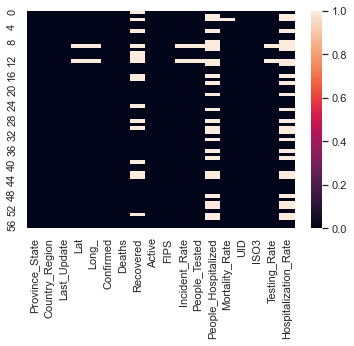

In [284]:
# Checking null values using heatmap for better undetstanding.
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cd.isnull())

In [285]:
# Checking data set info
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

Observation - the dataset have 58 rows and 18 columns

Last_Update column have datetime data type, Province_state,Country_region and ISO3 columns have object data type and all other columns have numeric data type.

the dataset have missing/null values.

# Summary Statistics

In [286]:
cd.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Observation - The minimum death is 0 and maximum is 28636. 

The minimum recovered is 13 and maximum is 61886.

Unable to say outliers present in confirmed, deaths, recovered, active, incident_rate, people_hospitalized, testsing_rate columns because in may month new york is epicenter of coronavirus in USA. 


In [287]:
cd_cor=cd.corr()

In [288]:
cd_cor

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120959,0.120024,0.043318,0.120148,-0.374943,0.245693,0.084769,0.065030,-0.189675,0.774106,0.309579,-0.162856
Long_,-0.278274,1.000000,0.009998,0.028772,-0.043379,0.011654,0.367911,0.041318,-0.077781,0.280909,0.318569,-0.526908,0.190191,0.251661
Confirmed,0.120959,0.009998,1.000000,0.982191,0.876856,0.985218,-0.096696,0.711776,0.828022,0.989936,0.383425,0.153972,0.334032,0.327376
Deaths,0.120024,0.028772,0.982191,1.000000,0.856295,0.954378,-0.075053,0.712117,0.741730,0.992313,0.427721,0.120043,0.345441,0.325817
Recovered,0.043318,-0.043379,0.876856,0.856295,1.000000,0.809437,-0.013571,0.592014,0.950785,0.962082,0.362330,0.166898,0.252155,0.302197
Active,0.120148,0.011654,0.985218,0.954378,0.809437,1.000000,-0.092276,0.703931,0.829687,0.976456,0.368403,0.146354,0.322773,0.332398
FIPS,-0.374943,0.367911,-0.096696,-0.075053,-0.013571,-0.092276,1.000000,-0.220264,-0.194011,0.013433,-0.262258,0.058022,-0.092705,-0.172665
Incident_Rate,0.245693,0.041318,0.711776,0.712117,0.592014,0.703931,-0.220264,1.000000,0.441669,0.725370,0.373338,0.264768,0.620621,0.258029
People_Tested,0.084769,-0.077781,0.828022,0.741730,0.950785,0.829687,-0.194011,0.441669,1.000000,0.906210,0.231301,0.236043,0.230753,0.356618
People_Hospitalized,0.065030,0.280909,0.989936,0.992313,0.962082,0.976456,0.013433,0.725370,0.906210,1.000000,0.509658,0.013433,0.331753,0.377586


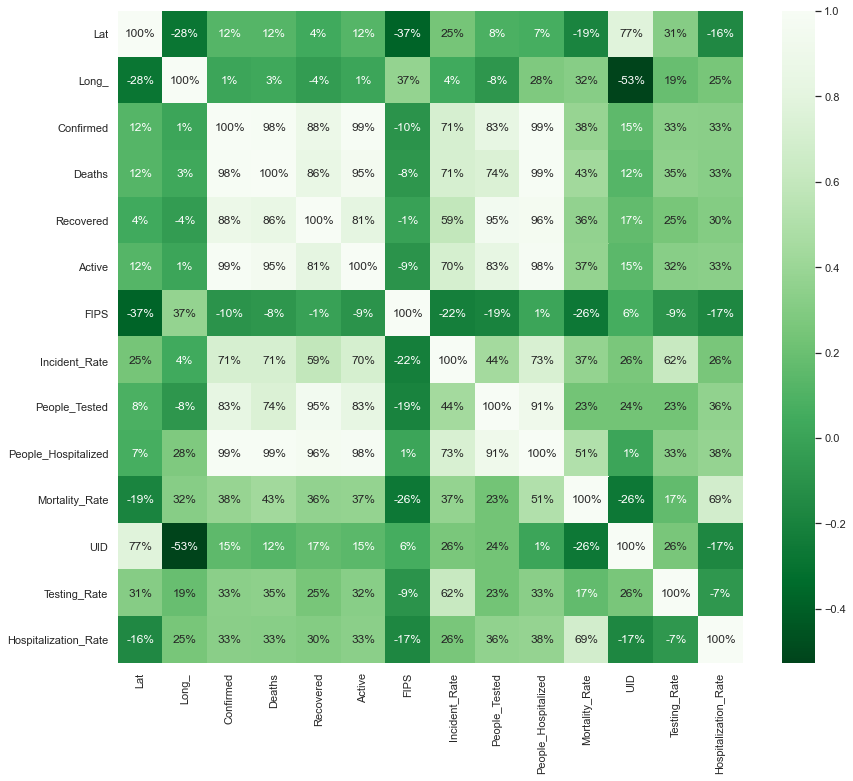

In [289]:
plt.figure(figsize=(14,12))
sns.heatmap(cd_cor,annot=True, fmt='.0%', cmap='Greens_r')
plt.show()

Observation - Confirmed,recovered active, people_tested, incident_rate,people_hospitalized are highly correlated with target variable.

In [290]:
# Fill null values

# filling Lat, Long_ columns NaN values according to map 

cd.at[9,'Lat']= 35.5311
cd.at[13,'Lat']= 37.7749
cd.at[9,'Long_']= 139.8894
cd.at[13,'Long_']= -122.4194

# Filling recovered columns NaN values by Confirmed-active-deaths.

cd.at[0,'Recovered']= cd.at[0,'Confirmed']-cd.at[0,'Active']-cd.at[0,'Deaths']
cd.at[2,'Recovered']= cd.at[2,'Confirmed']-cd.at[2,'Active']-cd.at[2,'Deaths']
cd.at[5,'Recovered']= cd.at[5,'Confirmed']-cd.at[5,'Active']-cd.at[5,'Deaths']
cd.at[9,'Recovered']= cd.at[9,'Confirmed']-cd.at[9,'Active']-cd.at[9,'Deaths']
cd.at[11,'Recovered']= cd.at[11,'Confirmed']-cd.at[11,'Active']-cd.at[11,'Deaths']
cd.at[12,'Recovered']= cd.at[12,'Confirmed']-cd.at[12,'Active']-cd.at[12,'Deaths']
cd.at[13,'Recovered']= cd.at[13,'Confirmed']-cd.at[13,'Active']-cd.at[13,'Deaths']
cd.at[17,'Recovered']= cd.at[17,'Confirmed']-cd.at[17,'Active']-cd.at[17,'Deaths']
cd.at[18,'Recovered']= cd.at[18,'Confirmed']-cd.at[18,'Active']-cd.at[18,'Deaths']
cd.at[25,'Recovered']= cd.at[25,'Confirmed']-cd.at[25,'Active']-cd.at[25,'Deaths']
cd.at[29,'Recovered']= cd.at[29,'Confirmed']-cd.at[29,'Active']-cd.at[29,'Deaths']
cd.at[31,'Recovered']= cd.at[31,'Confirmed']-cd.at[31,'Active']-cd.at[31,'Deaths']
cd.at[40,'Recovered']= cd.at[40,'Confirmed']-cd.at[40,'Active']-cd.at[40,'Deaths']
cd.at[43,'Recovered']= cd.at[43,'Confirmed']-cd.at[43,'Active']-cd.at[43,'Deaths']
cd.at[44,'Recovered']= cd.at[44,'Confirmed']-cd.at[44,'Active']-cd.at[44,'Deaths']
cd.at[54,'Recovered']= cd.at[54,'Confirmed']-cd.at[54,'Active']-cd.at[54,'Deaths']

In [291]:
# Filling Incident_rate column NaN values, use infomration from wikipedia

cd.at[9,'Incident_Rate']= 100000*cd.at[9,'Confirmed']/3711
cd.at[13,'Incident_Rate']= 100000*cd.at[13,'Confirmed']/3533

# Falling People_Tested column NaN values by total number of people on cruise. 

cd.at[9,'People_Tested']= 3711
cd.at[13,'People_Tested']= 3533

# Using mean method for fill missing values in People_Hospitalized column.

cd['People_Hospitalized'].fillna(value=cd['People_Hospitalized'].mean(), inplace=True)

# Filling Mortality_Rate column Nan values with 0 because no confirmed covid-19 case recorded.

cd.at[2,'Mortality_Rate']= 0

# Filling Testing_Rate column NaN values, use infomration from wikipedia

cd.at[9,'Testing_Rate']= 100000*cd.at[9,'People_Tested']/3711
cd.at[13,'Testing_Rate']= 100000*cd.at[13,'People_Tested']/3533

# Using mean method for fill missing values in Hospitalization_Rate column.

cd['Hospitalization_Rate'].fillna(value=cd['Hospitalization_Rate'].mean(), inplace=True)

In [292]:
# Checking null values again.
cd.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

Observation - Now no null values present in dataset.

# Exploring Data Variables

In [293]:
# Printing object data types and their unique values

for column in cd.columns:
    if cd[column].dtype==object:
        print(str(column) + ' : ' + str(cd[column].unique()))
        print(cd[column].value_counts())
        print('***********************************************')
        print('\n')

Province_State : ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
Mississippi                 1
Ohio                        1
Georgia                     1
North Carolina              1
Minnesota                   1
New York                    1
Idaho                       1
American Samoa              1
Vermont           

 Observation - here we can see the summary of the categorical columns.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

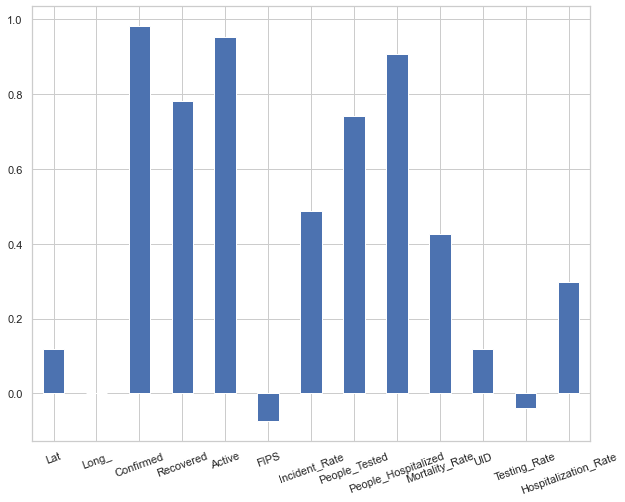

In [294]:
plt.figure(figsize=(10,8))
cd.drop('Deaths',axis=1).corrwith(cd['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)

Observation - Fips and testing_rate are negatively correlated with target variable.

confirmed,recovered,active and people_hospitalized highly correlated with target variable.

# Univariate Anaylsis

In [295]:
#Checking total number of Confirmed,Deaths,Recovered,Active,People_Tested and People_Hospitalized.
print('Confirmed cases : ',(cd['Confirmed'].sum()))
print('Total death :',(cd['Deaths'].sum()))
print('Total recovered patient :',(cd['Recovered'].sum()))
print('Total active cases :',(cd['Active'].sum()))
print('Total people tested :',(cd['People_Tested'].sum()))
print('Total people hospitalized :',(cd['People_Hospitalized'].sum()))


Confirmed cases :  1551853
Total death : 93439
Total recovered patient : 294312.0
Total active cases : 1164102.0
Total people tested : 12655035.0
Total people hospitalized : 284052.3636363636


Note - Unable to figure out approx number of people hospitalized using other variables.

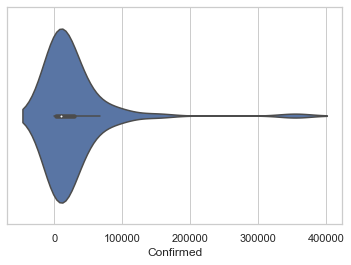

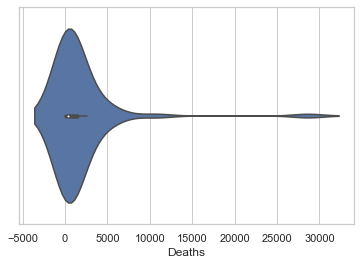

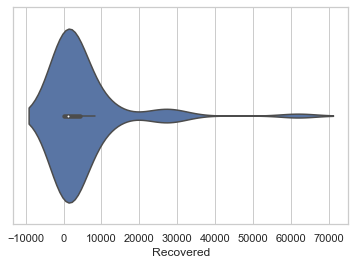

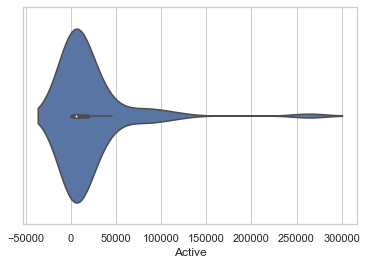

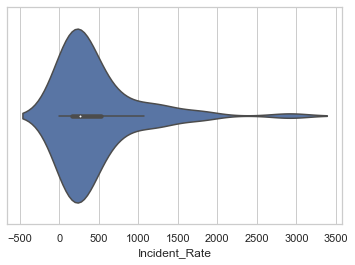

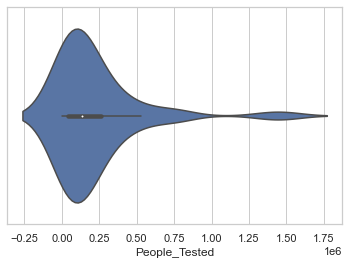

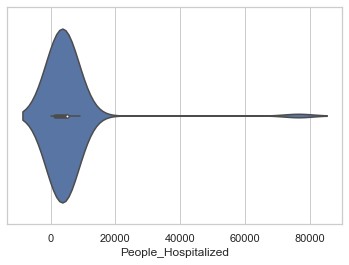

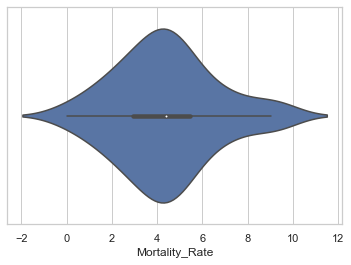

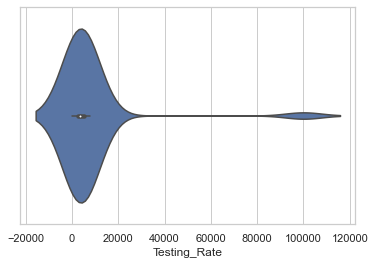

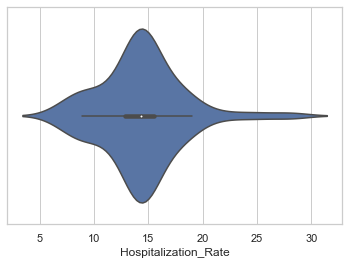

In [296]:
collist=cd.drop(columns=['Province_State','Country_Region', 'Last_Update', 'Lat', 'Long_','FIPS','UID', 'ISO3'])
for i in collist.columns:
    sns.set(style='whitegrid')
    sns.violinplot(collist[i])
    plt.show()


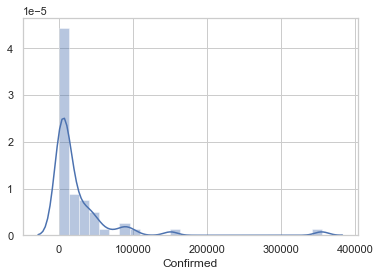

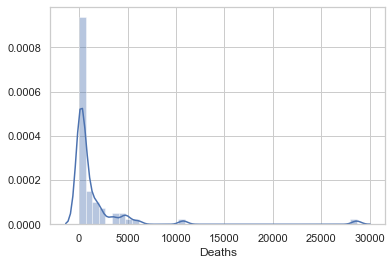

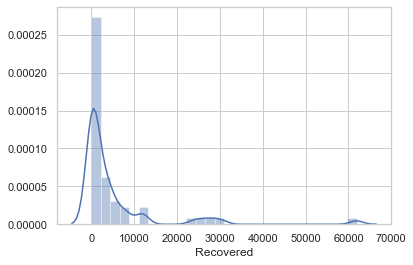

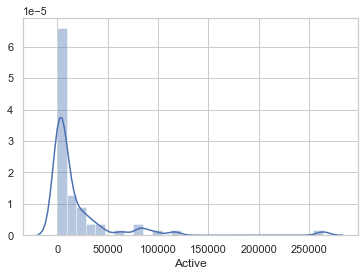

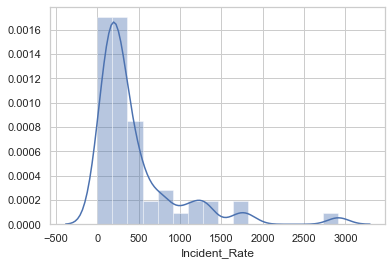

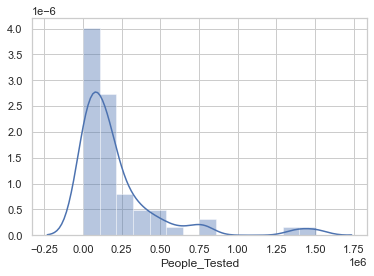

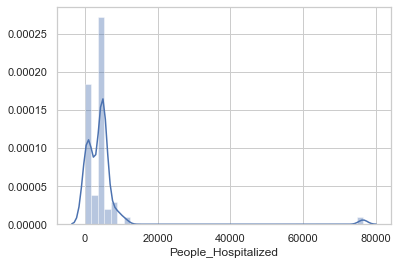

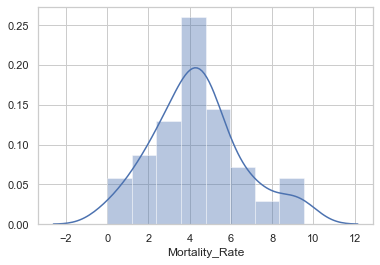

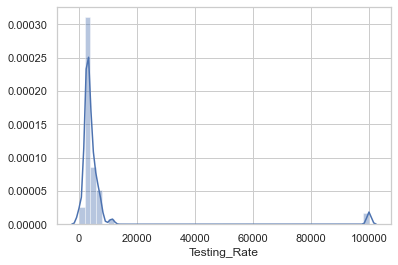

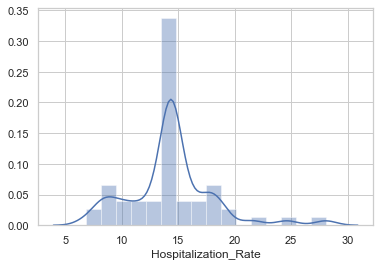

In [297]:
for i in collist.columns:
    sns.distplot(collist[i])
    plt.show()

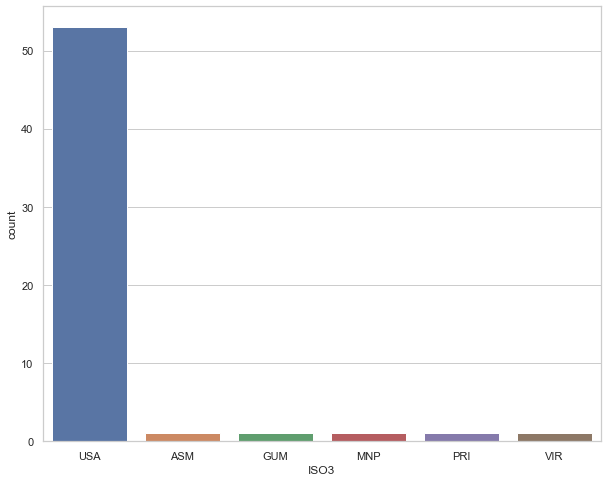

In [298]:
plt.subplots(figsize=(10,8))
sns.countplot(x='ISO3', data=cd)
plt.show()

# Bivariate Analysis

<Figure size 3600x7200 with 0 Axes>

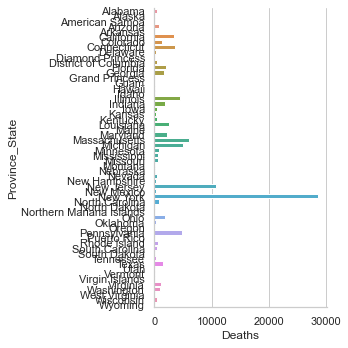

In [299]:
# Checking deaths per Province_State
plt.figure(figsize=(50,100))
sns.catplot(data=cd, x='Deaths', y='Province_State',kind='bar')

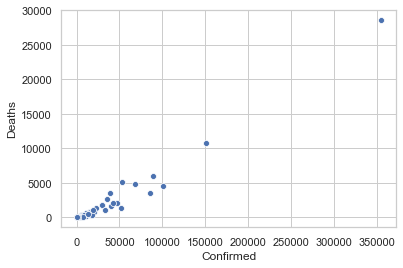

In [300]:
sns.scatterplot(data=cd,x='Confirmed',y='Deaths')

In [301]:
cd.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

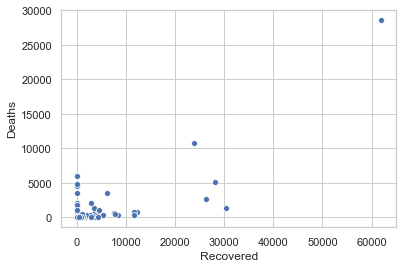

In [302]:
sns.scatterplot(data=cd,x='Recovered',y='Deaths')

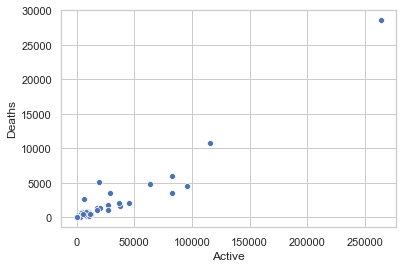

In [303]:
sns.scatterplot(data=cd,x='Active',y='Deaths')

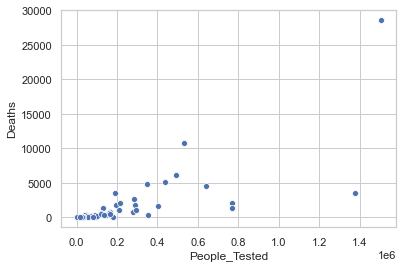

In [304]:
sns.scatterplot(data=cd,x='People_Tested',y='Deaths')

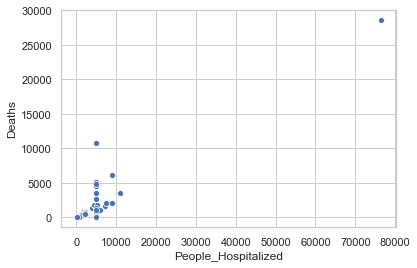

In [305]:
sns.scatterplot(data=cd,x='People_Hospitalized',y='Deaths')

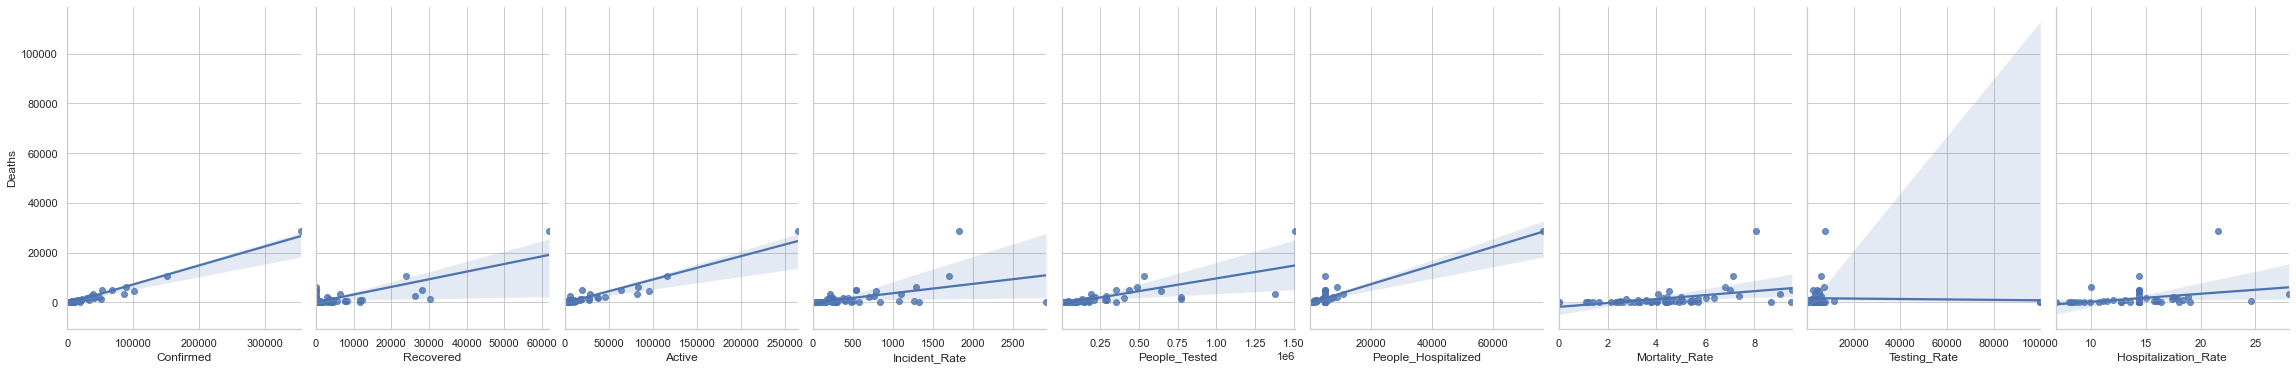

In [306]:
sns.pairplot(cd, x_vars=['Confirmed', 'Recovered', 'Active', 'Incident_Rate','People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate'], y_vars='Deaths', size=5, height=2.9, aspect=0.7, kind='reg')

In [307]:
# Removing columns Country_Region, Last_Update, Lat, Long_ columns due to not needed.

cd1=pd.DataFrame(cd.drop(columns=['Country_Region','Last_Update','Lat','Long_']))

# Checking skewness

In [308]:
cd1.skew()

Confirmed               4.708614
Deaths                  5.489201
Recovered               3.649556
Active                  4.180953
FIPS                    5.269070
Incident_Rate           2.549840
People_Tested           2.814255
People_Hospitalized     6.869437
Mortality_Rate          0.400879
UID                    -3.027480
Testing_Rate            5.144724
Hospitalization_Rate    0.867341
dtype: float64

In [309]:
# Treating skewness via log method

cd1.skew()
for col in cd1.skew().index:
    if col in cd1.describe().columns:
        if cd1[col].skew()>0.55:
            cd1[col]=np.log1p(cd1[col])

In [310]:
cd1.skew()

Confirmed              -1.374603
Deaths                 -0.568714
Recovered              -0.591539
Active                 -0.994488
FIPS                    3.421540
Incident_Rate          -1.496932
People_Tested          -1.361546
People_Hospitalized    -0.928480
Mortality_Rate          0.400879
UID                    -3.027480
Testing_Rate            0.055817
Hospitalization_Rate   -0.300911
dtype: float64

# Convert categorical data into numeric variable

In [315]:
# Convert data into numeric values

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in cd1.columns:
    if cd1[column].dtype==np.number:
        continue
    cd1[column]=le.fit_transform(cd1[column])

# Plotting outliers

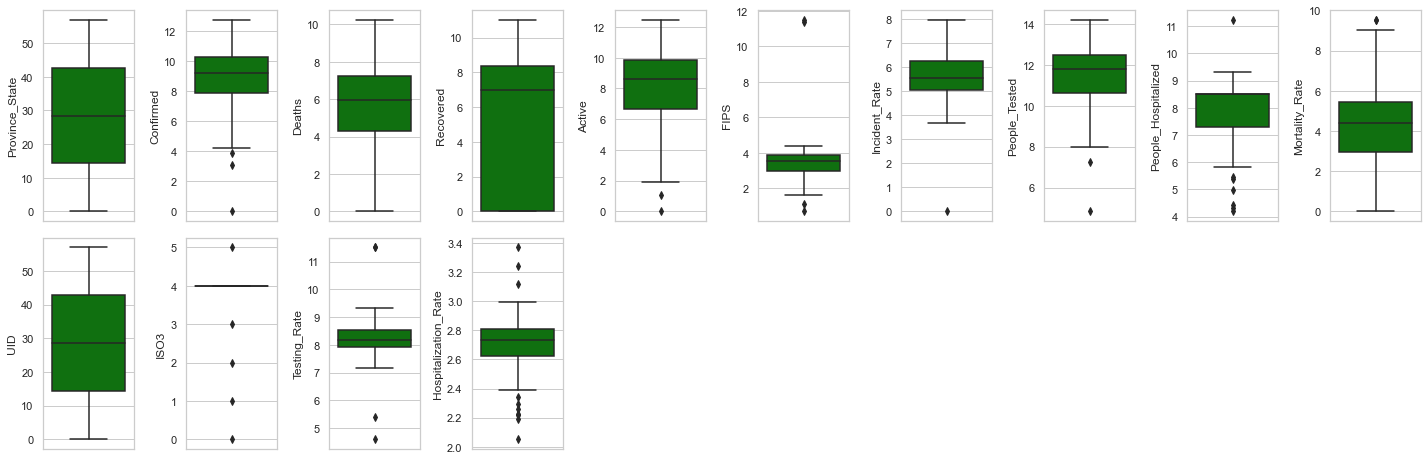

In [318]:
collist=cd1.columns.values
ncol=10
nrow=5

plt.figure(figsize=(20,16))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(cd1[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [319]:
from scipy.stats import zscore
z=np.abs(zscore(cd1))
z

array([[1.70244092e+00, 3.21337477e-01, 2.93758097e-01, 1.49565612e+00,
        5.35925495e-01, 1.70638299e+00, 1.50670182e-02, 3.65460707e-01,
        3.36196024e-01, 1.75496020e-01, 1.40376707e+00, 2.17198770e-01,
        1.09672793e-01, 7.34372945e-01],
       [1.64270615e+00, 1.17083224e+00, 1.39518751e+00, 6.76005604e-02,
        1.55757824e+00, 1.46521910e+00, 1.27899364e+00, 4.87563898e-01,
        5.37895230e-01, 8.67208924e-01, 1.34403230e+00, 2.17198770e-01,
        3.28278797e-01, 1.20355520e-01],
       [1.58297138e+00, 3.74178007e+00, 2.44393007e+00, 1.49565612e+00,
        2.90133559e+00, 3.26423922e-01, 4.60276687e+00, 3.74501573e+00,
        5.37895230e-01, 2.01289518e+00, 1.70244092e+00, 5.38170286e+00,
        2.98802242e+00, 1.20355520e-01],
       [1.52323661e+00, 3.78280325e-01, 4.50254778e-01, 6.98988268e-01,
        4.67569559e-01, 1.16138852e+00, 2.00723923e-01, 3.68878500e-01,
        2.01907016e-01, 2.89445358e-01, 1.28429754e+00, 2.17198770e-01,
        5.232

In [320]:
threshold=3
print(np.where(z>3))

(array([ 2,  2,  2,  2,  9,  9, 13, 13, 14, 44], dtype=int64), array([ 1,  6,  7, 11,  5, 12,  5, 12, 11, 12], dtype=int64))


In [323]:
cd1_new=cd1[(z<3).all(axis=1)]

In [324]:
print(cd1.shape)

(58, 14)


In [325]:
print(cd1_new.shape)

(53, 14)


# Model Training

In [329]:
# Separating data into input and output variables.

cd_x=cd1_new.drop(columns=['Deaths'])
y=pd.DataFrame(cd1_new['Deaths'])

In [330]:
y

,Deaths
0,6.259581
1,2.397895
3,6.617403
4,4.682131
5,8.159947
6,7.170120
7,8.169053
8,5.739793
10,6.011267
11,7.648263


In [331]:
# Scaling the input Variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(cd_x)
x=pd.DataFrame(x,columns=cd_x.columns)

In [332]:
x

,Province_State,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,-1.797518,0.182641,-1.689309,0.446861,-3.251228,-0.053759,0.215719,-0.276672,-0.286181,-1.564358,0.061546,-0.260092,-0.691625
1,-1.736876,-1.726420,-0.051528,-1.907466,-2.731180,-1.786931,-0.945484,0.570536,-1.008133,-1.499125,0.061546,0.766892,0.125991
2,-1.615592,0.255492,0.609960,0.369989,-2.075997,-0.342774,0.220372,-0.146513,0.199086,-1.433892,0.061546,-1.229852,-0.513081
3,-1.554950,-0.343279,0.615743,-0.570802,-1.842153,-0.575378,-0.201540,-1.008025,-1.178381,-1.368659,0.061546,-0.385261,-0.932404
4,-1.494309,1.216787,-1.689309,1.218902,-1.644440,-0.275695,1.873097,0.570536,-0.254038,-1.303426,0.061546,-0.158910,0.125991
5,-1.433667,0.488531,0.587237,0.595703,-1.322105,0.384123,0.043509,0.418079,0.528369,-1.238193,0.061546,-1.211847,0.823302
6,-1.373025,0.783284,0.751458,0.793766,-1.186970,1.507787,0.331172,1.144263,2.133106,-1.172961,0.061546,0.903549,2.614416
7,-1.312383,-0.072697,0.623813,-0.029206,-1.064726,1.217262,-0.786830,0.570536,-0.389817,-1.107728,0.061546,0.561573,0.125991
8,-1.191099,-0.117518,0.255442,0.151002,-0.953125,1.482821,-0.877574,0.570536,0.380632,-1.042495,0.061546,1.073667,0.125991
9,-1.130457,0.890860,-1.689309,0.973998,-0.850463,-0.258728,1.419831,0.999367,-0.086735,-0.977262,0.061546,-0.089600,1.123858


In [333]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [334]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(42, 13) 	 (11, 13)


In [335]:
print(y_train.shape,'\t',y_test.shape)

(42, 1) 	 (11, 1)


In [336]:
# Importing models library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Importing error metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [337]:
# Using algorithms via for loop

model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for p in model:
    p.fit(x_train,y_train)
    print('Score of', p , 'is:' , p.score(x_train,y_train))
    predp=p.predict(x_test)
    print('Error:')
    print('Mean absolute error:', mean_absolute_error(y_test,predp))
    print('Mean squared error:', mean_squared_error(y_test,predp))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predp)))
    print('r2_score:', r2_score(y_test,predp))
    print('********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.9945385641842519
Error:
Mean absolute error: 0.15057666004987544
Mean squared error: 0.06788448228862586
Root Mean squared error: 0.260546506959172
r2_score: 0.9854980626351902
********************************************************************************************


Score of Lasso() is: 0.6022886896826876
Error:
Mean absolute error: 1.0432960192408693
Mean squared error: 1.6398863900103295
Root Mean squared error: 1.2805804894696504
r2_score: 0.6496764958415471
********************************************************************************************


Score of Ridge() is: 0.9940460577241085
Error:
Mean absolute error: 0.14090745046308767
Mean squared error: 0.04345505886561638
Root Mean squared error: 0.20845877018157902
r2_score: 0.9907168395396472
********************************************************************************************


Score of ElasticNet() is: 0.7802861900125373
Error:
Mean absolute error: 0.7205224537725947
Mean square

In [338]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
rd=Ridge()
parameters={'random_state':range(42,100)}
gc=GridSearchCV(rd,parameters)
gc.fit(x,y)
gc.best_params_

{'random_state': 42}

In [339]:
from sklearn.model_selection import GridSearchCV
rd=Ridge()
parameters={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
gc=GridSearchCV(rd,parameters)
gc.fit(x,y)
gc.best_params_

{'alpha': 1}

In [340]:
#Using Ridge model with best results

rd=Ridge(alpha=1,random_state=42)
rd.fit(x_train,y_train)
print('Score:', rd.score(x_train,y_train))
predrd=rd.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error:', mean_squared_error(y_test,predrd))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrd)))
print('\n')
print('r2_score:', r2_score(y_test,predrd))
    

Score: 0.9940460577241085


Mean absolute error: 0.14090745046308767
Mean squared error: 0.04345505886561638
Root Mean squared error: 0.20845877018157902


r2_score: 0.9907168395396472


In [342]:
# Cross validate of DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(rd,x,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [0.97521667 0.99483085 0.98855527 0.96712742 0.98248508]
Mean Score: 0.009740715915682057
Standard Deviation: 0.009740715915682057


# Regularization 

In [343]:
from sklearn.linear_model import Ridge

In [344]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9940460577241085

In [358]:
rd.coef_

array([[-0.03909913,  0.61161966,  0.03565306,  0.33562309,  0.0390462 ,
         0.2944838 ,  0.61390602,  0.05801908,  0.51449543, -0.02183652,
         0.10649514, -0.15378218,  0.02339056]])

# Using Ensemble Technique to boostup score

In [368]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score:', r2_score(y_test,predrf))

score: 0.9835680216425629


Mean absolute error: 0.40183417781396513
Mean squared error: 0.3054939875049892
Root Mean squared error: 0.5527151051898158


r2_score: 0.9347383301343135


In [369]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor(base_estimator=rd,n_estimators=20,learning_rate=1.0,random_state=42)
ad.fit(x_train,y_train)
print('score:',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))
print('\n')
print('r2_score:', r2_score(y_test,predad))

score: 0.994038034399915


Mean absolute error: 0.1777835831402014
Mean squared error: 0.06935475450542969
Root Mean squared error: 0.26335290867091193


r2_score: 0.9851839732457086


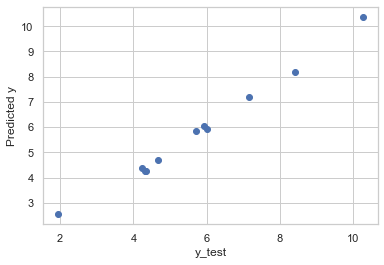

In [371]:
# Plotting scatter plot between test data and predicted data for Ridge
plt.scatter(y_test,predrd)
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.show()

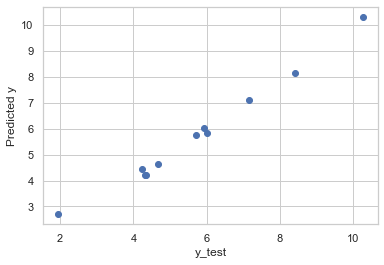

In [377]:
plt.scatter(y_test,predad)
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.show()

In [378]:
# Saving the Ridge model
import joblib
joblib.dump(rd,'COVID 19 Dataset.pkl')

['COVID 19 Dataset.pkl']